In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 

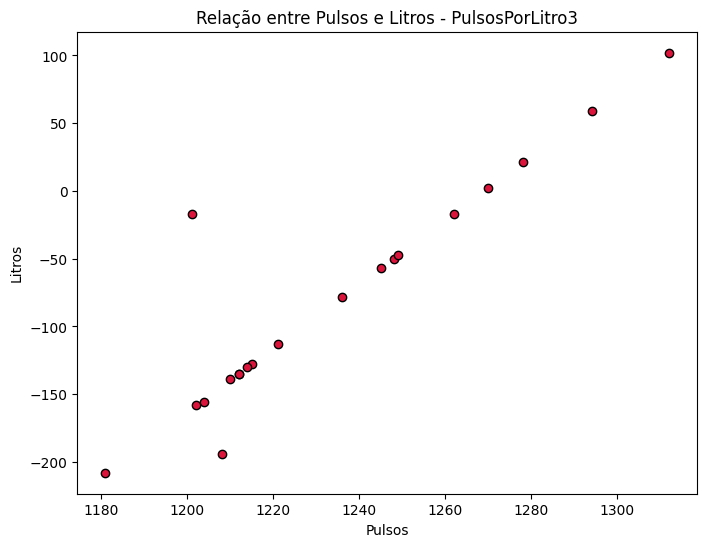

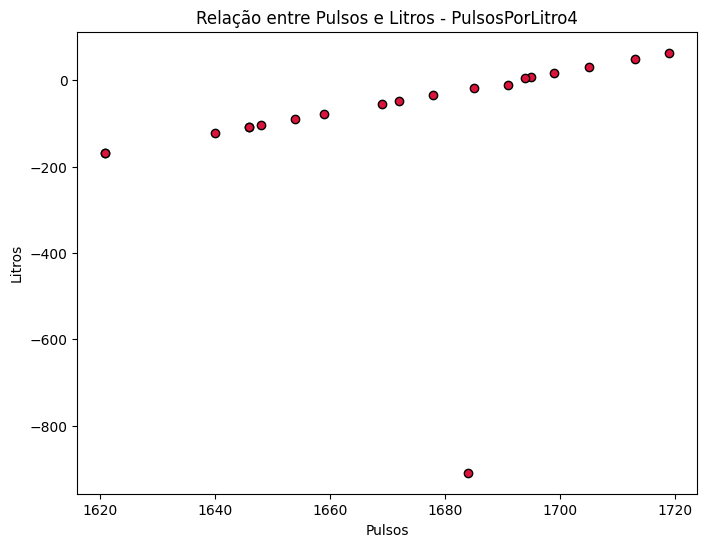

          filename  Media_pulsos  Erro_relativo_pulsos  Media_litros
0  PulsosPorLitro3       1233.70              0.027617       2921.10
1  PulsosPorLitro4       1671.95              0.016963       3907.75


In [86]:
def processar_arquivo(filepath):
    try:
        # Leitura dos dados
        pulsos = pd.read_csv(filepath, delimiter=' ', header=None, names=['Pulsos', 'Litros'])

        vec_pulsos = pulsos['Pulsos'].to_list()
        vec_litros = pulsos['Litros'].to_list()

        # Verificar se as listas não estão vazias
        if not vec_pulsos or not vec_litros:
            print(f"Dados vazios no arquivo {filepath}")
            return None, None, None

        # Cálculos estatísticos
        media_pulsos = np.mean(vec_pulsos)
        desvioP = np.std(vec_pulsos)
        erroR = desvioP / media_pulsos

        media_litros = abs(np.mean(vec_litros))

        # Resultados
        resultados = {
            'Media_pulsos': media_pulsos,
            'Erro_relativo_pulsos': erroR,
            'Media_litros': media_litros
        }

        return resultados, vec_pulsos, vec_litros
    except Exception as e:
        print(f"Erro ao processar o arquivo {filepath}: {e}")
        return None, None, None

diretorio = 'Pulsos'
todos_resultados = []
arquivos = os.listdir(diretorio)
arquivos.sort() 
valores_a_subtrair = [3000, 4000] 

if len(arquivos) != len(valores_a_subtrair):
    print("O número de arquivos não corresponde ao número de valores a subtrair")
else:
    for filename, valor_a_subtrair in zip(arquivos, valores_a_subtrair):
        filepath = os.path.join(diretorio, filename)
        resultados, vec_pulsos, vec_litros = processar_arquivo(filepath)
        
        if resultados is not None:
            # Adicionar os resultados à lista
            todos_resultados.append({'filename': filename, **resultados})
            vec_litros_ajustados = [litro - valor_a_subtrair for litro in vec_litros]

            # Plotando o gráfico de dispersão para cada arquivo
            plt.figure(figsize=(8, 6))
            plt.scatter(vec_pulsos, vec_litros_ajustados, color='crimson', ec = 'k')
            plt.title(f'Relação entre Pulsos e Litros - {filename}')
            plt.xlabel('Pulsos')
            plt.ylabel('Litros')
            plt.show()
        else:
            print(f"Não foram gerados resultados para o arquivo {filename}")
    # Convertendo todos os resultados para um DataFrame
    if todos_resultados:
        resultados_df = pd.DataFrame(todos_resultados)
        print(resultados_df)
        resultados_df.to_csv('resultados.csv', index=False)
    else:
        print("Nenhum resultado processado.")